#TASK 2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

The Titanic dataset is a rich historical record, allowing us to delve into the characteristics of passengers and discern patterns that may have influenced their survival. In this EDA, we aim to uncover insights into the factors that played a role in determining who survived the tragic sinking of the Titanic.


In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#loading dataset
titanic_data = pd.read_csv('/content/titanic_dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Looking for the null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Data Cleaning

Handling Missing Values

In [ ]:
#We filled missing age values with the median age, ensuring a representative imputation.
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
#The 'Cabin' column, with a substantial number of missing values, was dropped as it could not provide meaningful insights without extensive imputation.
titanic_data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Title        891 non-null    object  
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


#Exploratory Data Analysis (EDA)

In [ ]:
#The initial exploration of basic statistics provides an overview of central tendencies and spreads in the dataset. It lays the foundation for a deeper understanding of individual features.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


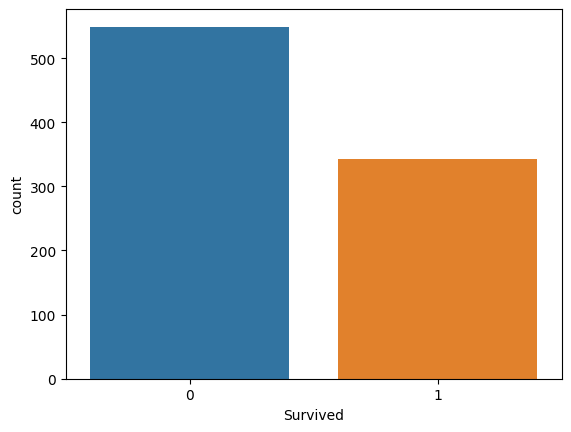

In [ ]:
#The count plot reveals an overall survival rate. The majority of passengers did not survive the disaster, setting the stage for investigating survival patterns.
sns.countplot(x='Survived', data=titanic_data)
plt.show()


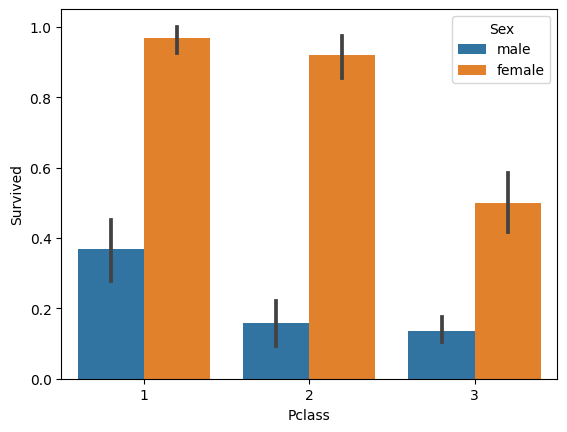

In [ ]:
#The bar plot unveils intriguing insights. Women, irrespective of class, had significantly higher survival rates. Additionally, first-class passengers exhibited a notably higher chance of survival.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data)
plt.show()


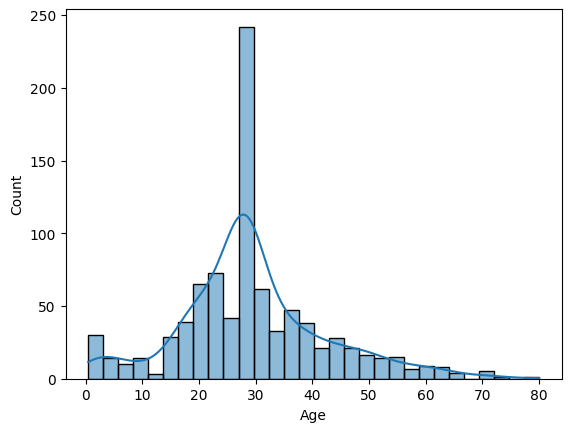

In [ ]:
#Examining the age distribution through a histogram with a kernel density estimate highlights the prevalence of young passengers. The right-skewed distribution indicates a higher number of children and young adults.
sns.histplot(x='Age', data=titanic_data, kde=True)
plt.show()


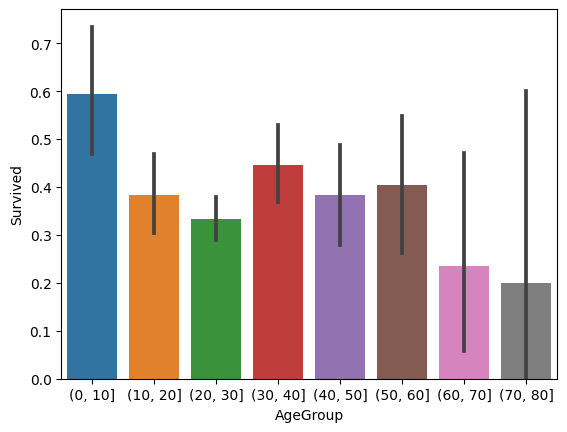

In [ ]:
#The bar plot segmented by age groups showcases the vulnerability of the very young (0-10 years) and the relatively higher survival rates among older passengers.
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins)
sns.barplot(x='AgeGroup', y='Survived', data=titanic_data)
plt.show()


<ipython-input-12-7ef64b3b25f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


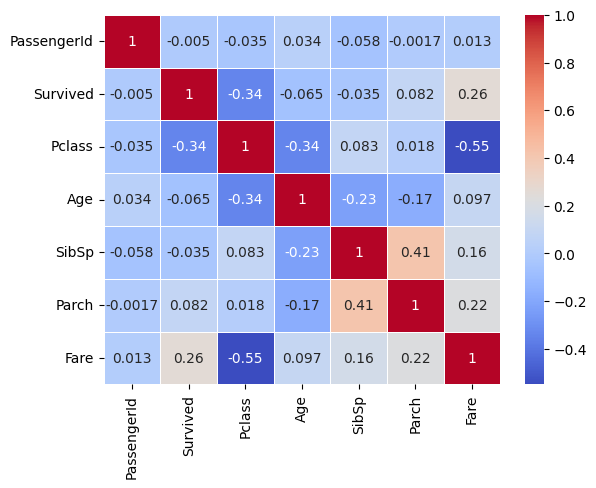

In [ ]:
#The correlation matrix provides a numerical overview of relationships between numerical features. It suggests potential multicollinearity between certain variables, warranting further investigation in advanced analysis.
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


#Advanced Analysis

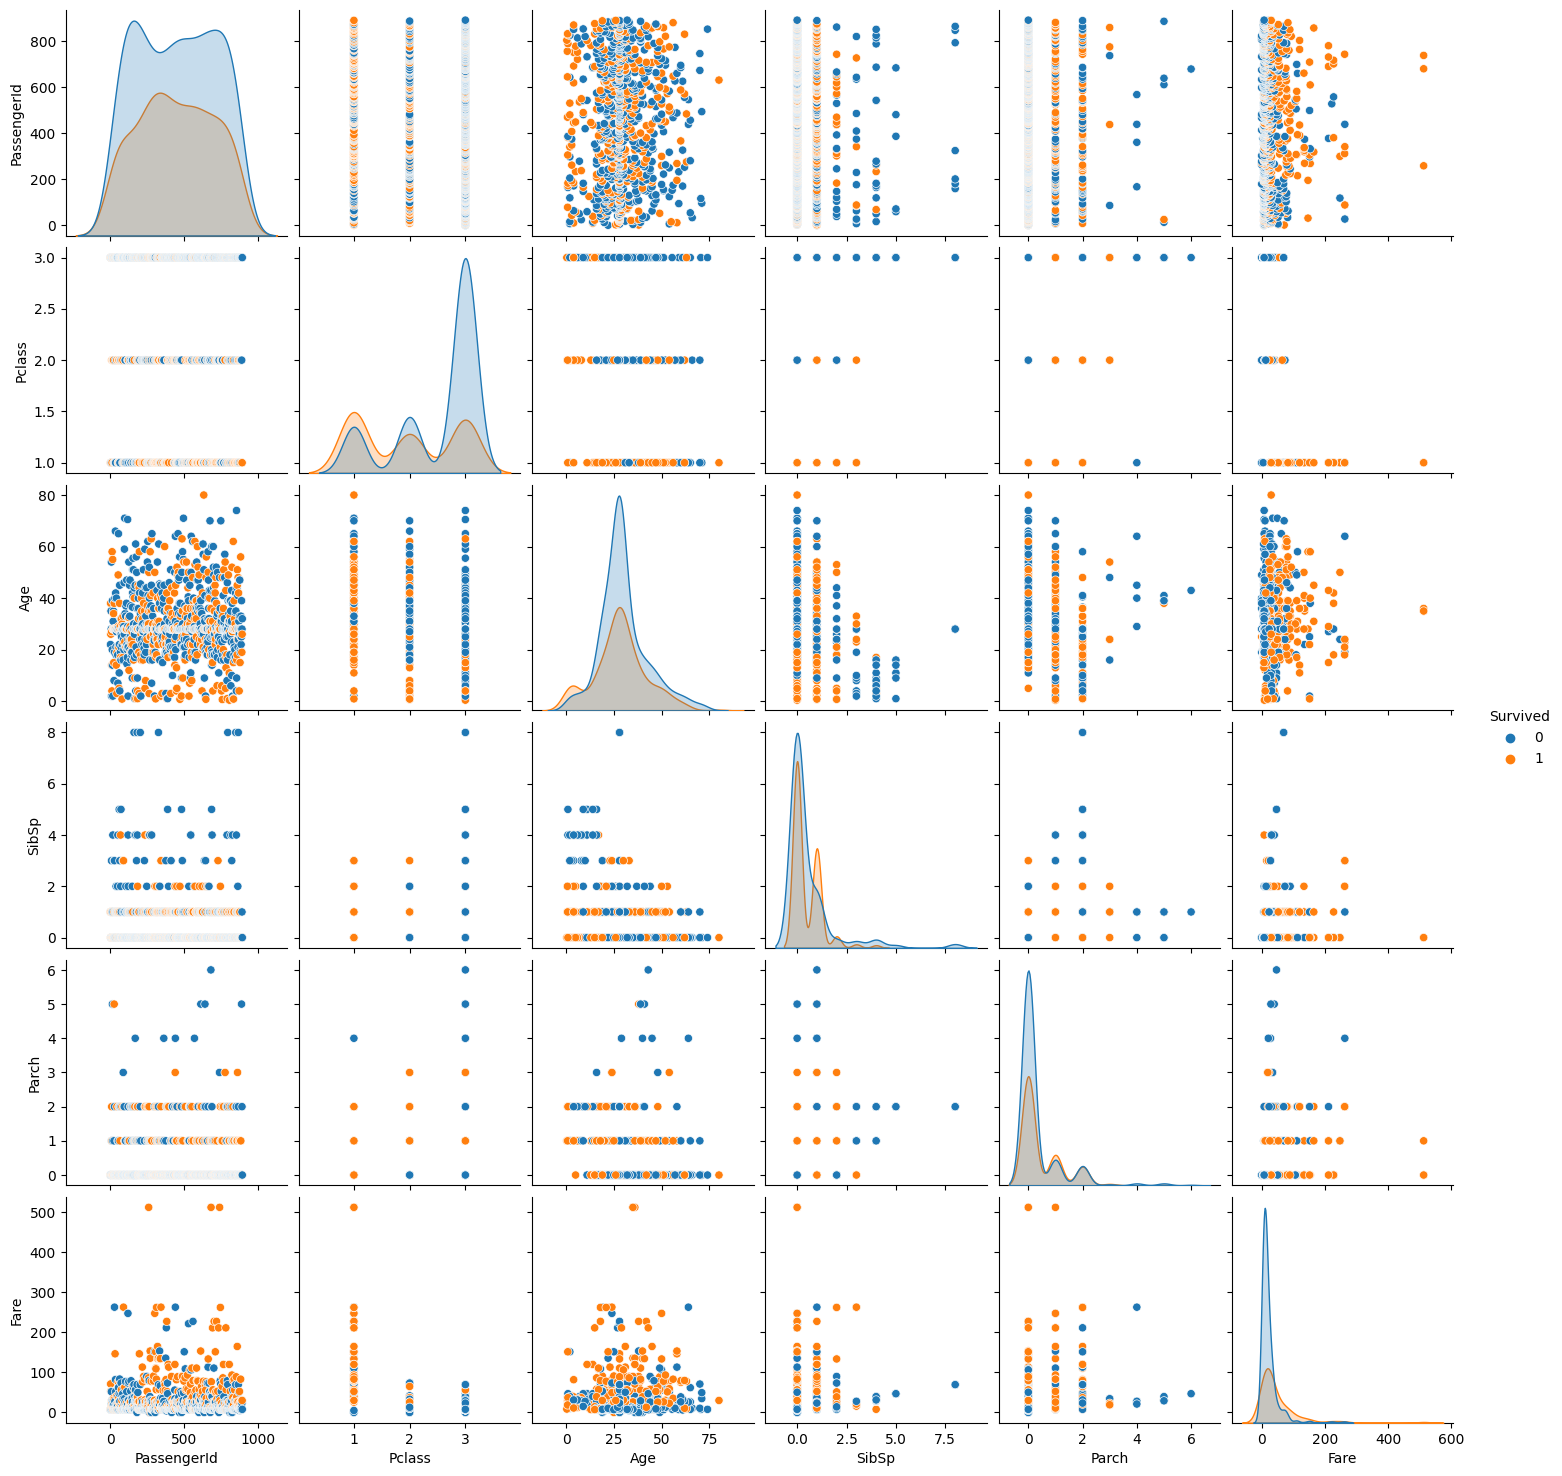

In [ ]:
#The pairplot with a hue for 'Survived' allows us to visually inspect relationships between variables. Notably, it reinforces the importance of passenger class and age in survival outcomes.
sns.pairplot(titanic_data, hue='Survived')
plt.show()


In [ ]:
#The interactive scatter plot created using Plotly offers a dynamic exploration of relationships between age, fare, passenger class, and survival. Hovering over data points provides detailed information.
import plotly.express as px

# Example: Interactive scatter plot using Plotly
fig = px.scatter(titanic_data, x='Age', y='Fare', color='Survived', size='Pclass', hover_data=['Sex'])
fig.show()


#Conclusion
1. Women and first-class passengers had higher survival rates.
2. Age played a significant role, with children and older adults more likely to survive.
3. The correlation matrix suggests complex relationships between variables.